### Attaching Libraries 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Reading the dataset

In [9]:

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df=pd.read_csv('E:/EDA/J-Comp/socialmediastocks2012-2022.csv', sep=',', index_col = 'Date', parse_dates = ['Date'],date_parser = dateparse).fillna(0)


In [10]:
df.head()


Symbol  Adj Close      Close       High        Low       Open  \
Date                                                                       
2012-05-18     FB  38.230000  38.230000  45.000000  38.000000  42.049999   
2012-05-21     FB  34.029999  34.029999  36.660000  33.000000  36.529999   
2012-05-22     FB  31.000000  31.000000  33.590000  30.940001  32.610001   
2012-05-23     FB  32.000000  32.000000  32.500000  31.360001  31.370001   
2012-05-24     FB  33.029999  33.029999  33.209999  31.770000  32.950001   

                 Volume  
Date                     
2012-05-18  573576400.0  
2012-05-21  168192700.0  
2012-05-22  101786600.0  
2012-05-23   73600000.0  
2012-05-24   50237200.0

### From above we can infer that the dataset contains of 8398 rows. It has Meta (facebook), twitter, snapchat, etsy, pinterest daily stock prices from 2012-2022. Meta is represented by FB, Snapchat is represented by SNAP, Etsy is represented by etsy, Pintrest is represented by PINS and Twitter is represented by TWTR.

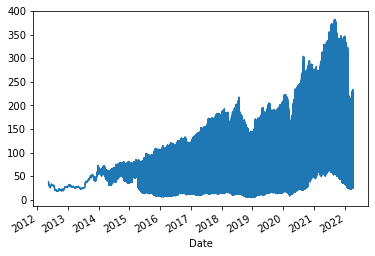

In [11]:
df.Close.plot()
plt.show()

In [12]:
df['Returns'] = df['Close'].pct_change()
df= df.dropna()
df

Symbol   Adj Close       Close        High         Low        Open  \
Date                                                                            
2012-05-21     FB   34.029999   34.029999   36.660000   33.000000   36.529999   
2012-05-22     FB   31.000000   31.000000   33.590000   30.940001   32.610001   
2012-05-23     FB   32.000000   32.000000   32.500000   31.360001   31.370001   
2012-05-24     FB   33.029999   33.029999   33.209999   31.770000   32.950001   
2012-05-25     FB   31.910000   31.910000   32.950001   31.110001   32.900002   
...           ...         ...         ...         ...         ...         ...   
2022-04-06     FB  223.300003  223.300003  228.990005  221.410004  226.910004   
2022-04-06   TWTR   50.770000   50.770000   52.869999   49.299999   50.040001   
2022-04-06   PINS   24.440001   24.440001   25.559999   23.870001   25.559999   
2022-04-06   SNAP   36.470001   36.470001   37.740002   35.639999   37.369999   
2022-04-06   ETSY  125.470001  125.470001  128.229996  121.389999  128.179993   

                 Volume   Returns  
Date                               
2012-05-21  168192700.0 -0.109861  
2012-05-22  101786600.0 -0.089039  
2012-05-23   73600000.0  0.032258  
2012-05-24   50237200.0  0.032187  
2012-05-25   37149800.0 -0.033909  
...                 ...       ...  
2022-04-06   28969100.0  0.714922  
2022-04-06  158865600.0 -0.772638  
2022-04-06   12274200.0 -0.518613  
2022-04-06   21549700.0  0.492226  
2022-04-06    3521700.0  2.440362  

[8397 rows x 8 columns]

In [13]:
df['MA200'] = df['Adj Close'].rolling(window =200).mean()


In [14]:
df['price change'] = df['Adj Close'].pct_change()


In [15]:
df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)

In [16]:
df['avg up'] = df['Upmove'].ewm(span =19).mean()
df['avg down'] = df['Downmove'].ewm(span = 19).mean()

In [17]:
df['RS'] = df['avg up']/ df['avg down']


### Relative Strength Index, Momentum indicator used in analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions. A value 30 or below indicates an oversold or undervalued condition. Above 70 considered overbought


In [18]:
df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))

In [19]:
df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'

In [20]:
df


Symbol   Adj Close       Close        High         Low        Open  \
Date                                                                            
2012-05-21     FB   34.029999   34.029999   36.660000   33.000000   36.529999   
2012-05-22     FB   31.000000   31.000000   33.590000   30.940001   32.610001   
2012-05-23     FB   32.000000   32.000000   32.500000   31.360001   31.370001   
2012-05-24     FB   33.029999   33.029999   33.209999   31.770000   32.950001   
2012-05-25     FB   31.910000   31.910000   32.950001   31.110001   32.900002   
...           ...         ...         ...         ...         ...         ...   
2022-04-06     FB  223.300003  223.300003  228.990005  221.410004  226.910004   
2022-04-06   TWTR   50.770000   50.770000   52.869999   49.299999   50.040001   
2022-04-06   PINS   24.440001   24.440001   25.559999   23.870001   25.559999   
2022-04-06   SNAP   36.470001   36.470001   37.740002   35.639999   37.369999   
2022-04-06   ETSY  125.470001  125.470001  128.229996  121.389999  128.179993   

                 Volume   Returns     MA200  price change    Upmove  Downmove  \
Date                                                                            
2012-05-21  168192700.0 -0.109861       NaN           NaN  0.000000  0.000000   
2012-05-22  101786600.0 -0.089039       NaN     -0.089039  0.000000  0.089039   
2012-05-23   73600000.0  0.032258       NaN      0.032258  0.032258  0.000000   
2012-05-24   50237200.0  0.032187       NaN      0.032187  0.032187  0.000000   
2012-05-25   37149800.0 -0.033909       NaN     -0.033909  0.000000  0.033909   
...                 ...       ...       ...           ...       ...       ...   
2022-04-06   28969100.0  0.714922  89.66910      0.714922  0.714922  0.000000   
2022-04-06  158865600.0 -0.772638  89.74305     -0.772638  0.000000  0.772638   
2022-04-06   12274200.0 -0.518613  89.73185     -0.518613  0.000000  0.518613   
2022-04-06   21549700.0  0.492226  89.72640      0.492226  0.492226  0.000000   
2022-04-06    3521700.0  2.440362  89.64760      2.440362  2.440362  0.000000   

              avg up  avg down        RS        RSI  Buy  
Date                                                      
2012-05-21  0.000000  0.000000       NaN        NaN  NaN  
2012-05-22  0.000000  0.046863  0.000000   0.000000  NaN  
2012-05-23  0.011903  0.029570  0.402546  28.701079  NaN  
2012-05-24  0.017802  0.020972  0.848840  45.912029   No  
2012-05-25  0.013455  0.024131  0.557568  35.797342   No  
...              ...       ...       ...        ...  ...  
2022-04-06  0.809321  0.204876  3.950287  79.799152   No  
2022-04-06  0.728389  0.261653  2.783801  73.571551   No  
2022-04-06  0.655550  0.287349  2.281375  69.524967   No  
2022-04-06  0.639218  0.258614  2.471707  71.195726   No  
2022-04-06  0.819332  0.232752  3.520187  77.877020   No  

[8397 rows x 17 columns]

In [21]:
df.dropna()


Symbol   Adj Close       Close        High         Low        Open  \
Date                                                                            
2013-03-08     FB   27.959999   27.959999   28.469999   27.730000   28.430000   
2013-03-11     FB   28.139999   28.139999   28.639999   27.830000   28.010000   
2013-03-12     FB   27.830000   27.830000   28.320000   27.600000   28.100000   
2013-03-13     FB   27.080000   27.080000   27.650000   26.920000   27.620001   
2013-03-14     FB   27.040001   27.040001   27.430000   26.830000   27.100000   
...           ...         ...         ...         ...         ...         ...   
2022-04-06     FB  223.300003  223.300003  228.990005  221.410004  226.910004   
2022-04-06   TWTR   50.770000   50.770000   52.869999   49.299999   50.040001   
2022-04-06   PINS   24.440001   24.440001   25.559999   23.870001   25.559999   
2022-04-06   SNAP   36.470001   36.470001   37.740002   35.639999   37.369999   
2022-04-06   ETSY  125.470001  125.470001  128.229996  121.389999  128.179993   

                 Volume   Returns     MA200  price change    Upmove  Downmove  \
Date                                                                            
2013-03-08   44198900.0 -0.021694  25.61875     -0.021694  0.000000  0.021694   
2013-03-11   35642100.0  0.006438  25.58930      0.006438  0.006438  0.000000   
2013-03-12   27569600.0 -0.011016  25.57345     -0.011016  0.000000  0.011016   
2013-03-13   39619500.0 -0.026949  25.54885     -0.026949  0.000000  0.026949   
2013-03-14   27646400.0 -0.001477  25.51890     -0.001477  0.000000  0.001477   
...                 ...       ...       ...           ...       ...       ...   
2022-04-06   28969100.0  0.714922  89.66910      0.714922  0.714922  0.000000   
2022-04-06  158865600.0 -0.772638  89.74305     -0.772638  0.000000  0.772638   
2022-04-06   12274200.0 -0.518613  89.73185     -0.518613  0.000000  0.518613   
2022-04-06   21549700.0  0.492226  89.72640      0.492226  0.492226  0.000000   
2022-04-06    3521700.0  2.440362  89.64760      2.440362  2.440362  0.000000   

              avg up  avg down        RS        RSI Buy  
Date                                                     
2013-03-08  0.008539  0.008389  1.017916  50.443915  No  
2013-03-11  0.008329  0.007550  1.103186  52.453079  No  
2013-03-12  0.007496  0.007897  0.949282  48.699054  No  
2013-03-13  0.006746  0.009802  0.688284  40.768253  No  
2013-03-14  0.006072  0.008969  0.676949  40.367901  No  
...              ...       ...       ...        ...  ..  
2022-04-06  0.809321  0.204876  3.950287  79.799152  No  
2022-04-06  0.728389  0.261653  2.783801  73.571551  No  
2022-04-06  0.655550  0.287349  2.281375  69.524967  No  
2022-04-06  0.639218  0.258614  2.471707  71.195726  No  
2022-04-06  0.819332  0.232752  3.520187  77.877020  No  

[8198 rows x 17 columns]

In [22]:
df['Symbol'].unique()



array(['FB', 'TWTR', 'ETSY', 'SNAP', 'PINS'], dtype=object)

### Group Visualizations


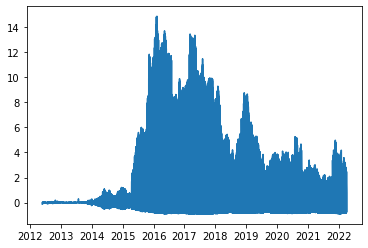

In [23]:
plt.plot(df['Returns'])
plt.show()


In [24]:
#Testing stationarity
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    
    #plots
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='green', label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print('Results of ADF Test ')
    adft = adfuller(timeseries, autolag='AIC')
    
    index_lst = ['Test Statistics', 'P-Value', '# of Lags Used', '# of Observations Used']
    out = pd.Series(adft[0:4], index = index_lst)
    for key, value in adft[4].items():
        out['critical value (%s)'%key] = value
        
    print(out)

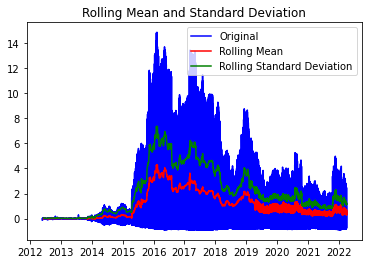

Results of ADF Test 
Test Statistics             -1.747017
P-Value                      0.407065
# of Lags Used              33.000000
# of Observations Used    8363.000000
critical value (1%)         -3.431132
critical value (5%)         -2.861886
critical value (10%)        -2.566954
dtype: float64


In [25]:
test_stationarity(df['Returns'])


In [26]:
temp = df.groupby(['Symbol', 'Date'])['Close'].mean()
temp = temp.reset_index()
names = temp['Symbol'].unique()
for name in names: 
    data = temp[['Close','Date']][temp['Symbol']==name]
    fig = px.line(data, x = 'Date', y = 'Close', title = f"{name}'s Price",labels = {'Close': 'Close'})
    fig.show()

In [27]:
df_total = df[df['Symbol'].isin(['FB','ETSY','TWTR','SNAP','PINS'])]
x = df_total.groupby(['Symbol', 'Date'])['High'].mean()
x = x.reset_index()

px.scatter(x,x='Date', y='High',size = 'High', color = 'Symbol', hover_name = 'Symbol')


In [28]:
temp1 = df.groupby(['Symbol', 'Date'])['Returns'].mean()
temp1 = temp1.reset_index()
names = temp1['Symbol'].unique()
for name in names: 
    data = temp1[['Returns','Date']][temp['Symbol']==name]
    fig = px.line(data, x = 'Date', y = 'Returns', title = f"{name}'s Price",labels = {'Close': 'Close'})
    fig.show()

### FaceBook(META) Analysis

In [29]:
fb_df = df[df['Symbol']=='FB']


In [30]:
fb_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2487 entries, 2012-05-21 to 2022-04-06
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        2487 non-null   object 
 1   Adj Close     2487 non-null   float64
 2   Close         2487 non-null   float64
 3   High          2487 non-null   float64
 4   Low           2487 non-null   float64
 5   Open          2487 non-null   float64
 6   Volume        2487 non-null   float64
 7   Returns       2487 non-null   float64
 8   MA200         2288 non-null   float64
 9   price change  2486 non-null   float64
 10  Upmove        2487 non-null   float64
 11  Downmove      2487 non-null   float64
 12  avg up        2487 non-null   float64
 13  avg down      2487 non-null   float64
 14  RS            2486 non-null   float64
 15  RSI           2486 non-null   float64
 16  Buy           2466 non-null   object 
dtypes: float64(15), object(2)
memory usage: 349.7+ KB


In [31]:
fb_df['Returns'].value_counts()\
            .head(10)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Set3', subset='Count')

In [32]:
fb_df['Symbol'].unique()


array(['FB'], dtype=object)

Text(0, 0.5, 'MeanAverage 200')

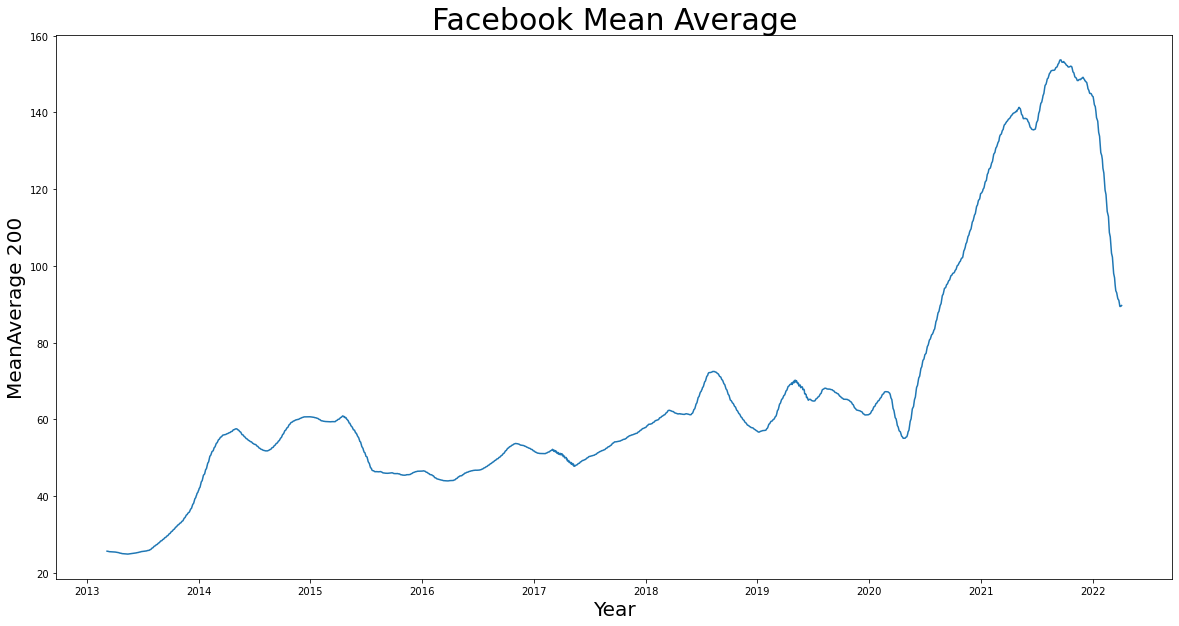

In [33]:
plt.figure(figsize=(20,10))
plt.plot('MA200', data = fb_df)
plt.title('Facebook Mean Average', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('MeanAverage 200', fontsize = 20)

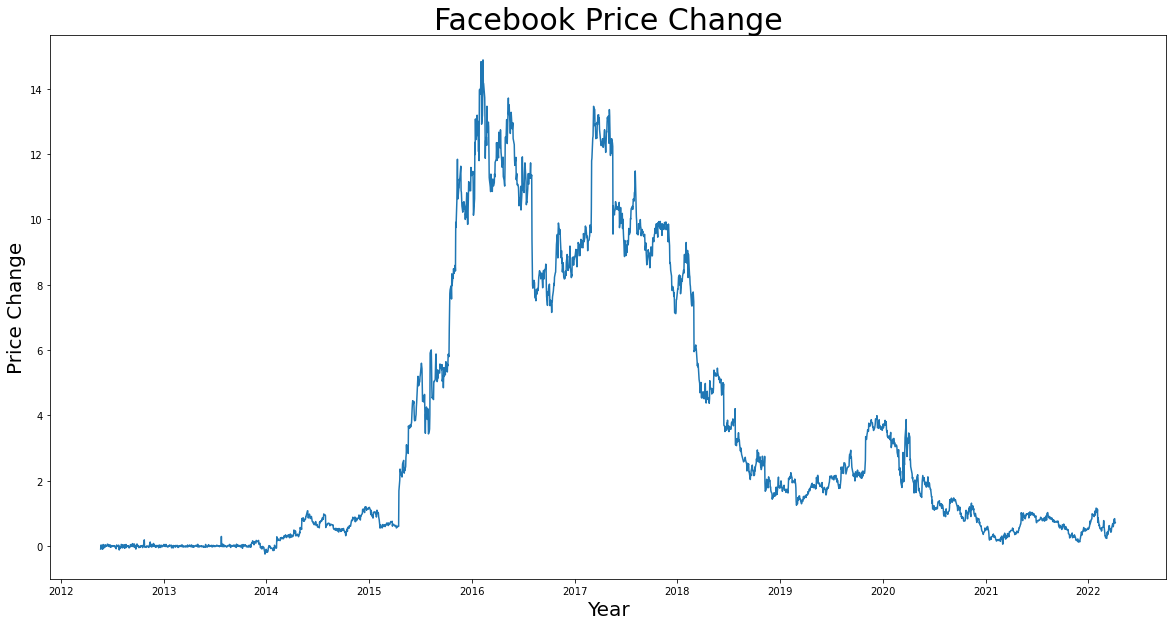

In [34]:
plt.figure(figsize=(20,10))
plt.plot('price change',data = fb_df)
plt.title('Facebook Price Change', fontsize = 30)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Price Change', fontsize = 20)
plt.show()

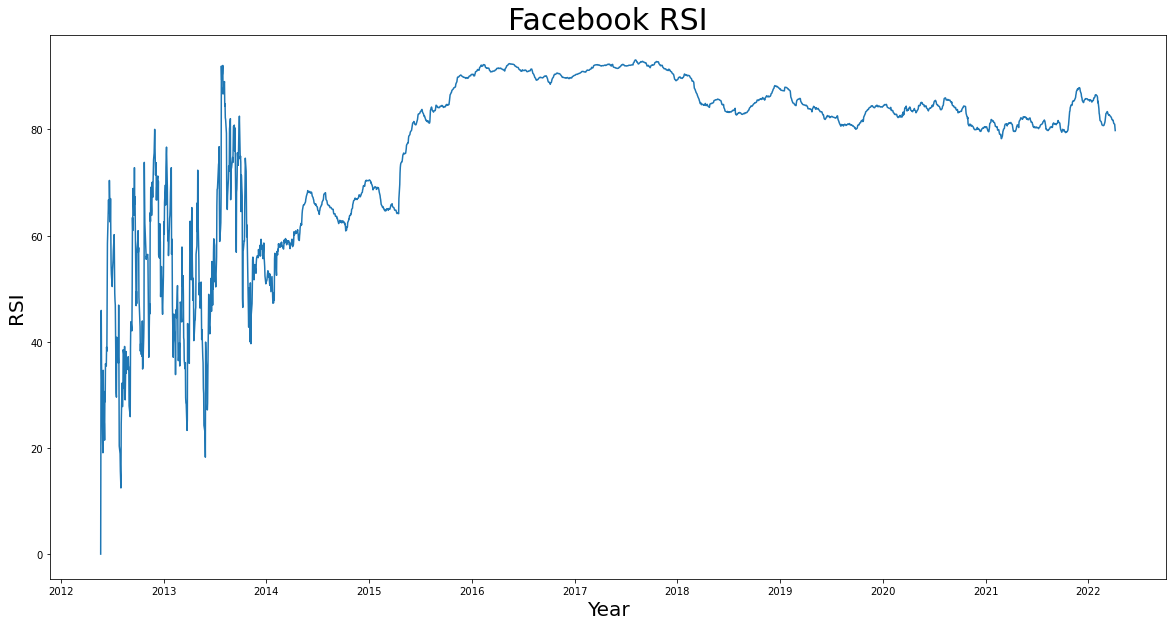

In [35]:
plt.figure(figsize=(20,10))
plt.plot('RSI',data = fb_df)
plt.title('Facebook RSI', fontsize = 30)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('RSI', fontsize = 20)
plt.show()

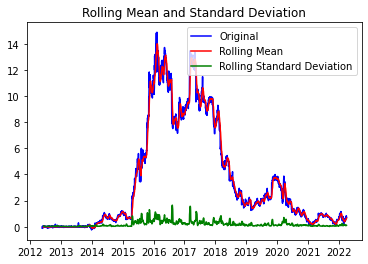

Results of ADF Test 
Test Statistics             -1.402397
P-Value                      0.581126
# of Lags Used               9.000000
# of Observations Used    2477.000000
critical value (1%)         -3.432993
critical value (5%)         -2.862708
critical value (10%)        -2.567392
dtype: float64


In [36]:
test_stationarity(fb_df['Returns'])


### Twitter Analysis

In [37]:
twt_df = df[df['Symbol']=='TWTR']


In [38]:
twt_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2118 entries, 2013-11-07 to 2022-04-06
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        2118 non-null   object 
 1   Adj Close     2118 non-null   float64
 2   Close         2118 non-null   float64
 3   High          2118 non-null   float64
 4   Low           2118 non-null   float64
 5   Open          2118 non-null   float64
 6   Volume        2118 non-null   float64
 7   Returns       2118 non-null   float64
 8   MA200         2118 non-null   float64
 9   price change  2118 non-null   float64
 10  Upmove        2118 non-null   float64
 11  Downmove      2118 non-null   float64
 12  avg up        2118 non-null   float64
 13  avg down      2118 non-null   float64
 14  RS            2118 non-null   float64
 15  RSI           2118 non-null   float64
 16  Buy           2118 non-null   object 
dtypes: float64(15), object(2)
memory usage: 297.8+ KB


In [39]:
twt_df['Returns'].value_counts()\
            .head(10)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Set3', subset='Count')

Text(0, 0.5, 'MeanAverage 200')

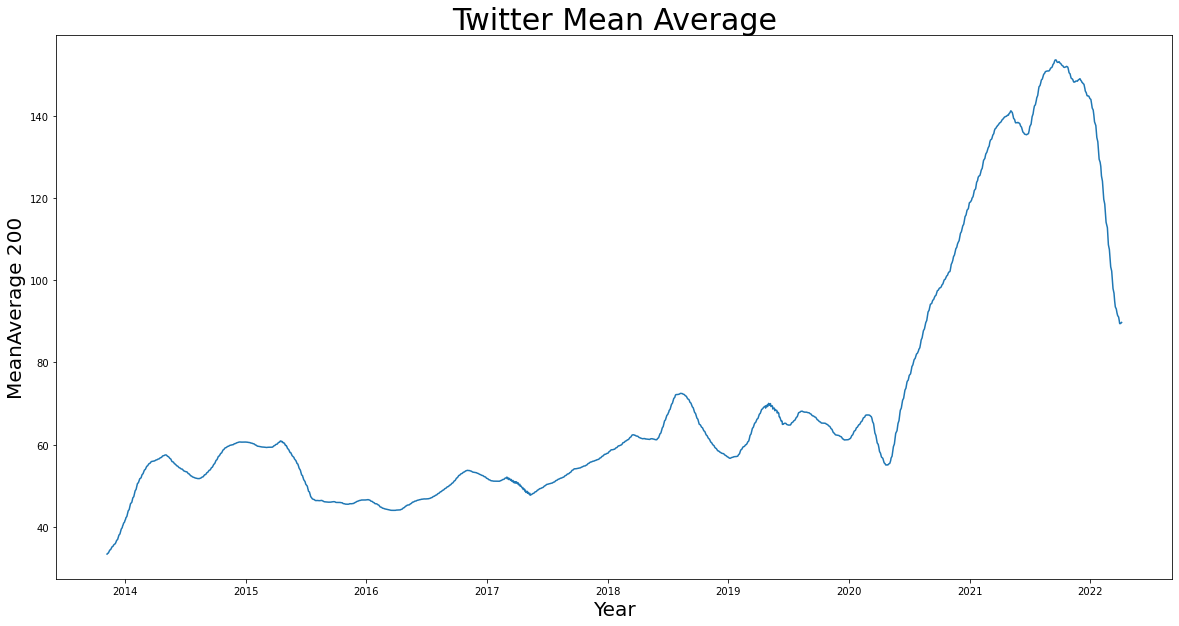

In [40]:
plt.figure(figsize=(20,10))
plt.plot('MA200', data = twt_df)
plt.title('Twitter Mean Average', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('MeanAverage 200', fontsize = 20)

Text(0, 0.5, 'Price Change')

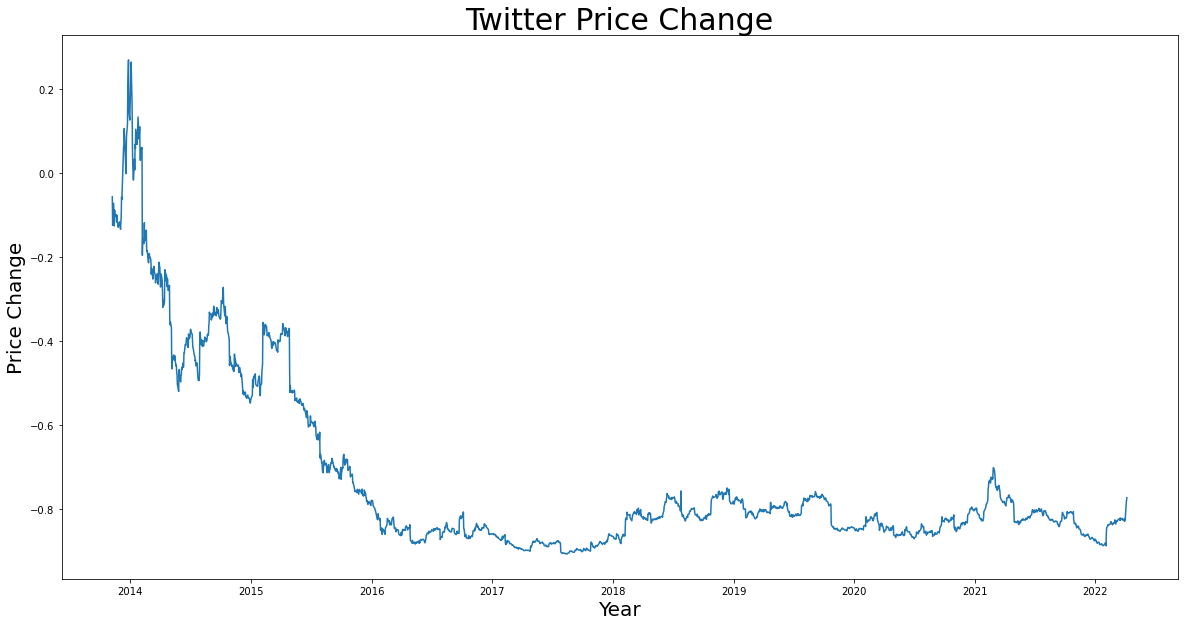

In [41]:
plt.figure(figsize=(20,10))
plt.plot('price change', data = twt_df)
plt.title('Twitter Price Change', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('Price Change', fontsize = 20)

Text(0, 0.5, 'RSI')

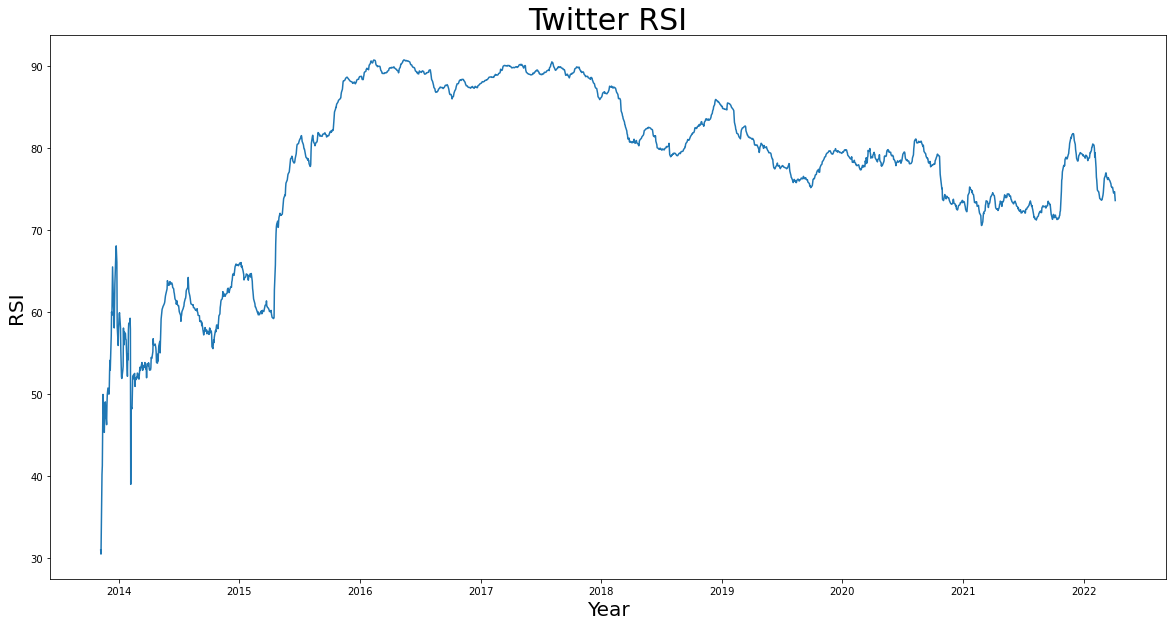

In [42]:
plt.figure(figsize=(20,10))
plt.plot('RSI', data = twt_df)
plt.title('Twitter RSI', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('RSI', fontsize = 20)

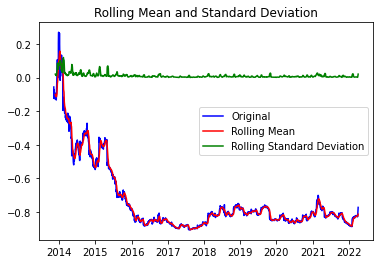

Results of ADF Test 
Test Statistics             -4.353750
P-Value                      0.000358
# of Lags Used              26.000000
# of Observations Used    2091.000000
critical value (1%)         -3.433481
critical value (5%)         -2.862923
critical value (10%)        -2.567506
dtype: float64


In [43]:
test_stationarity(twt_df['Returns'])


### Etsy Analysis


In [44]:
etsy_df = df[df['Symbol']=='ETSY']


In [45]:
etsy_df


Symbol   Adj Close       Close        High         Low        Open  \
Date                                                                            
2015-04-16   ETSY   30.000000   30.000000   35.740002   28.219999   31.000000   
2015-04-17   ETSY   27.580000   27.580000   30.299999   26.510000   29.770000   
2015-04-20   ETSY   24.900000   24.900000   28.900000   24.870001   28.770000   
2015-04-21   ETSY   25.750000   25.750000   26.040001   24.559999   24.969999   
2015-04-22   ETSY   25.120001   25.120001   26.240000   24.950001   26.000000   
...           ...         ...         ...         ...         ...         ...   
2022-03-31   ETSY  124.279999  124.279999  134.904999  124.230003  134.139999   
2022-04-01   ETSY  127.050003  127.050003  128.384995  122.529999  126.230003   
2022-04-04   ETSY  136.169998  136.169998  138.880005  126.139999  128.580002   
2022-04-05   ETSY  130.210007  130.210007  136.869995  128.610001  135.419998   
2022-04-06   ETSY  125.470001  125.470001  128.229996  121.389999  128.179993   

                Volume   Returns     MA200  price change    Upmove  Downmove  \
Date                                                                           
2015-04-16  19763300.0 -0.423410  60.67700     -0.423410  0.000000  0.423410   
2015-04-17   3965500.0 -0.455586  60.70415     -0.455586  0.000000  0.455586   
2015-04-20   3076200.0 -0.515564  60.55195     -0.515564  0.000000  0.515564   
2015-04-21   2184700.0 -0.498246  60.56285     -0.498246  0.000000  0.498246   
2015-04-22   1442500.0 -0.514402  60.39755     -0.514402  0.000000  0.514402   
...                ...       ...       ...           ...       ...       ...   
2022-03-31   3805900.0  2.453181  89.48065      2.453181  2.453181  0.000000   
2022-04-01   2958200.0  2.397968  89.50665      2.397968  2.397968  0.000000   
2022-04-04   3780000.0  2.461362  89.57120      2.461362  2.461362  0.000000   
2022-04-05   3280000.0  2.404183  89.65350      2.404183  2.404183  0.000000   
2022-04-06   3521700.0  2.440362  89.64760      2.440362  2.440362  0.000000   

              avg up  avg down        RS        RSI Buy  
Date                                                     
2015-04-16  0.259992  0.220866  1.177147  54.068327  No  
2015-04-17  0.326640  0.240128  1.360276  57.632068  No  
2015-04-20  0.401149  0.260935  1.537350  60.588805  No  
2015-04-21  0.483454  0.274811  1.759226  63.757954  No  
2015-04-22  0.537653  0.286765  1.874892  65.216079  No  
...              ...       ...       ...        ...  ..  
2022-03-31  0.837507  0.215851  3.880018  79.508271  No  
2022-04-01  0.833064  0.217491  3.830338  79.297515  No  
2022-04-04  0.832445  0.222337  3.744071  78.921059  No  
2022-04-05  0.819810  0.227641  3.601335  78.267175  No  
2022-04-06  0.819332  0.232752  3.520187  77.877020  No  

[1758 rows x 17 columns]

In [46]:
etsy_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1758 entries, 2015-04-16 to 2022-04-06
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        1758 non-null   object 
 1   Adj Close     1758 non-null   float64
 2   Close         1758 non-null   float64
 3   High          1758 non-null   float64
 4   Low           1758 non-null   float64
 5   Open          1758 non-null   float64
 6   Volume        1758 non-null   float64
 7   Returns       1758 non-null   float64
 8   MA200         1758 non-null   float64
 9   price change  1758 non-null   float64
 10  Upmove        1758 non-null   float64
 11  Downmove      1758 non-null   float64
 12  avg up        1758 non-null   float64
 13  avg down      1758 non-null   float64
 14  RS            1758 non-null   float64
 15  RSI           1758 non-null   float64
 16  Buy           1758 non-null   object 
dtypes: float64(15), object(2)
memory usage: 247.2+ KB


In [47]:
etsy_df['Returns'].value_counts()\
            .head(10)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Set3', subset='Count')

Text(0, 0.5, 'MeanAverage 200')

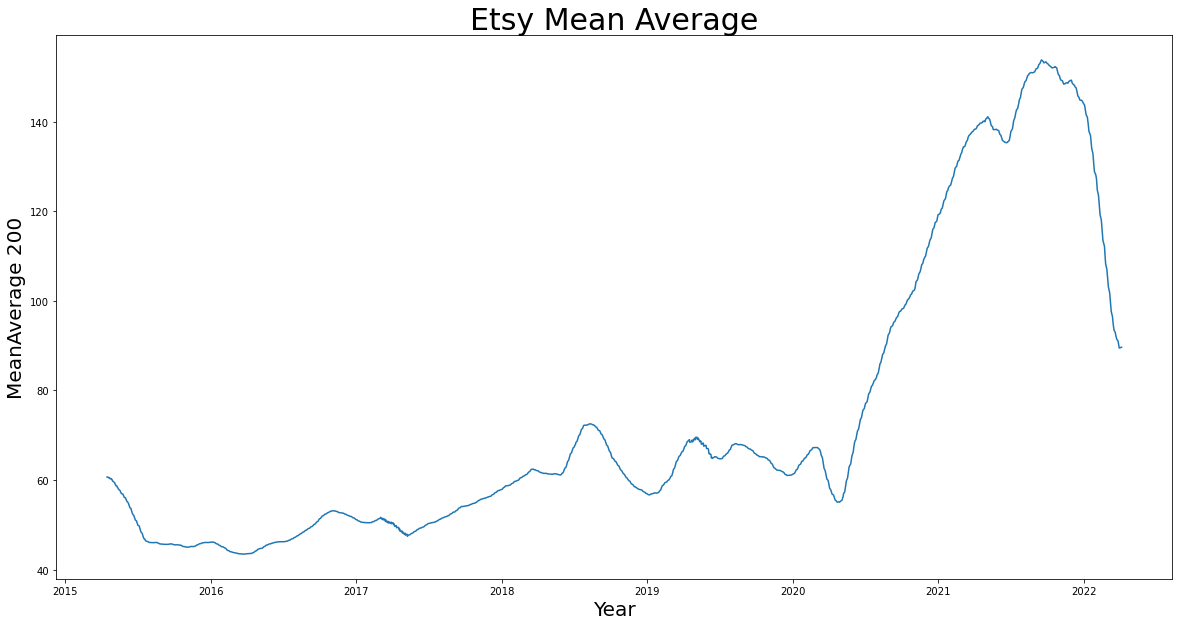

In [48]:
plt.figure(figsize=(20,10))
plt.plot('MA200', data = etsy_df)
plt.title('Etsy Mean Average', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('MeanAverage 200', fontsize = 20)

Text(0, 0.5, 'Price Change')

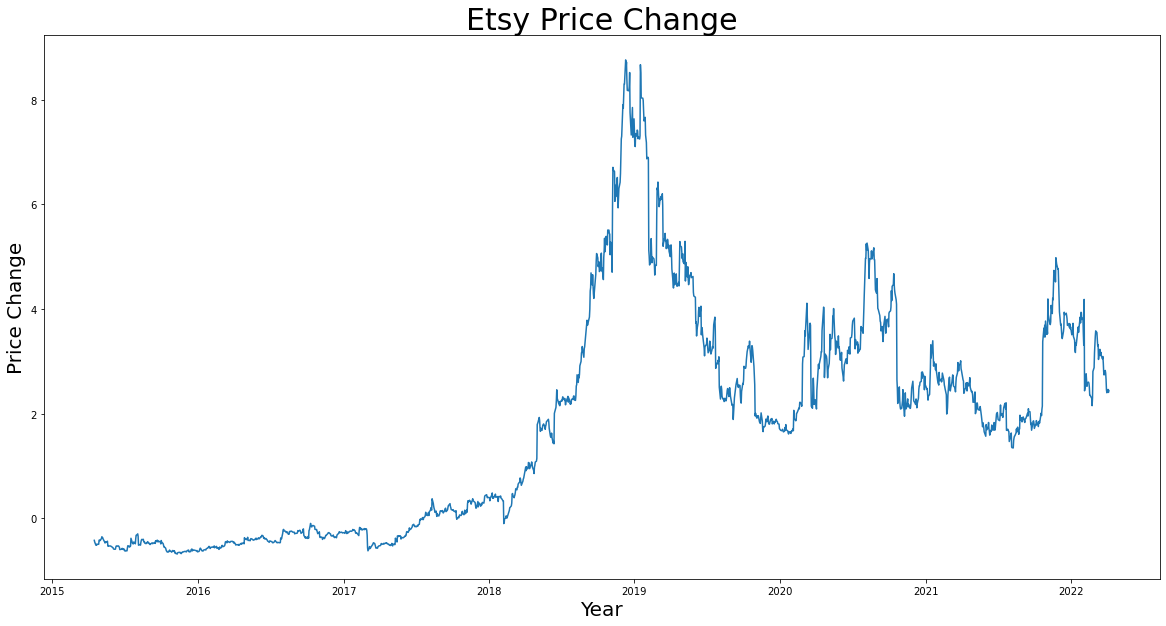

In [49]:
plt.figure(figsize=(20,10))
plt.plot('price change', data = etsy_df)

plt.title('Etsy Price Change', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('Price Change', fontsize = 20)

Text(0, 0.5, 'RSI')

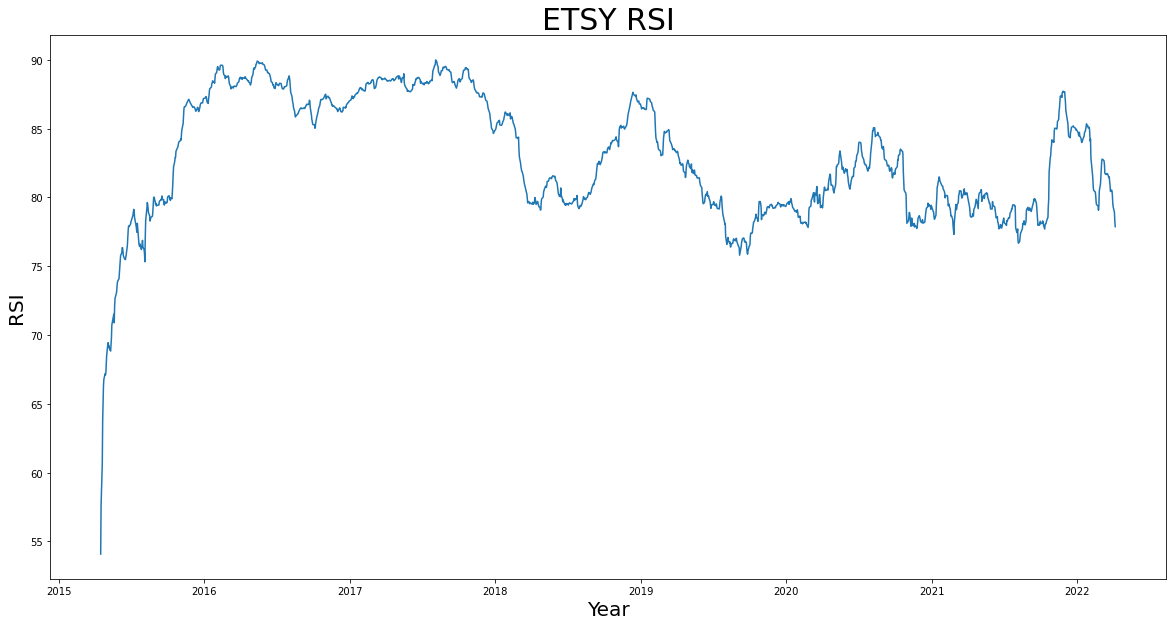

In [50]:
plt.figure(figsize=(20,10))
plt.plot('RSI', data = etsy_df)
plt.title('ETSY RSI', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('RSI', fontsize = 20)

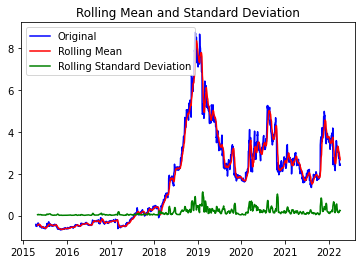

Results of ADF Test 
Test Statistics             -1.573048
P-Value                      0.497117
# of Lags Used              14.000000
# of Observations Used    1743.000000
critical value (1%)         -3.434107
critical value (5%)         -2.863200
critical value (10%)        -2.567654
dtype: float64


In [51]:
test_stationarity(etsy_df['Returns'])


### SnapChat Analysis


In [52]:
snap_df = df[df['Symbol']=='SNAP']


In [53]:
snap_df


Symbol  Adj Close      Close       High        Low       Open  \
Date                                                                       
2017-03-02   SNAP  24.480000  24.480000  26.049999  23.500000  24.000000   
2017-03-03   SNAP  27.090000  27.090000  29.440001  26.059999  26.389999   
2017-03-06   SNAP  23.770000  23.770000  28.250000  23.770000  28.170000   
2017-03-07   SNAP  21.440001  21.440001  22.500000  20.639999  22.209999   
2017-03-08   SNAP  22.809999  22.809999  23.430000  21.309999  22.030001   
...           ...        ...        ...        ...        ...        ...   
2022-03-31   SNAP  35.990002  35.990002  36.869999  35.764999  36.750000   
2022-04-01   SNAP  37.389999  37.389999  38.599998  36.200001  36.200001   
2022-04-04   SNAP  39.340000  39.340000  39.570000  37.369999  38.250000   
2022-04-05   SNAP  38.250000  38.250000  39.799999  37.820000  39.500000   
2022-04-06   SNAP  36.470001  36.470001  37.740002  35.639999  37.369999   

                 Volume   Returns     MA200  price change    Upmove  Downmove  \
Date                                                                            
2017-03-02  217048900.0  0.550348  51.60340      0.550348  0.550348       0.0   
2017-03-03  148166400.0  0.720000  51.70785      0.720000  0.720000       0.0   
2017-03-06   72903000.0  0.527635  51.81935      0.527635  0.527635       0.0   
2017-03-07   71857800.0  0.412385  51.38860      0.412385  0.412385       0.0   
2017-03-08   49819100.0  0.496719  51.49640      0.496719  0.496719       0.0   
...                 ...       ...       ...           ...       ...       ...   
2022-03-31   15777700.0  0.462414  89.54945      0.462414  0.462414       0.0   
2022-04-01   25272900.0  0.507054  89.50620      0.507054  0.507054       0.0   
2022-04-04   25402800.0  0.435766  89.55870      0.435766  0.435766       0.0   
2022-04-05   22261200.0  0.463835  89.68075      0.463835  0.463835       0.0   
2022-04-06   21549700.0  0.492226  89.72640      0.492226  0.492226       0.0   

              avg up  avg down        RS        RSI Buy  
Date                                                     
2017-03-02  3.143576  0.359007  8.756302  89.750215  No  
2017-03-03  3.095786  0.356366  8.687100  89.676993  No  
2017-03-06  3.095256  0.359099  8.619497  89.604446  No  
2017-03-07  3.087811  0.357456  8.638288  89.624714  No  
2017-03-08  3.131722  0.354112  8.843876  89.841400  No  
...              ...       ...       ...        ...  ..  
2022-03-31  0.657988  0.239835  2.743504  73.287057  No  
2022-04-01  0.659186  0.241657  2.727779  73.174374  No  
2022-04-04  0.651454  0.247041  2.637029  72.505030  No  
2022-04-05  0.643768  0.252934  2.545203  71.792873  No  
2022-04-06  0.639218  0.258614  2.471707  71.195726  No  

[1285 rows x 17 columns]

In [54]:
snap_df['Returns'].value_counts()\
            .head(10)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Set3', subset='Count')

Text(0, 0.5, 'MeanAverage 200')

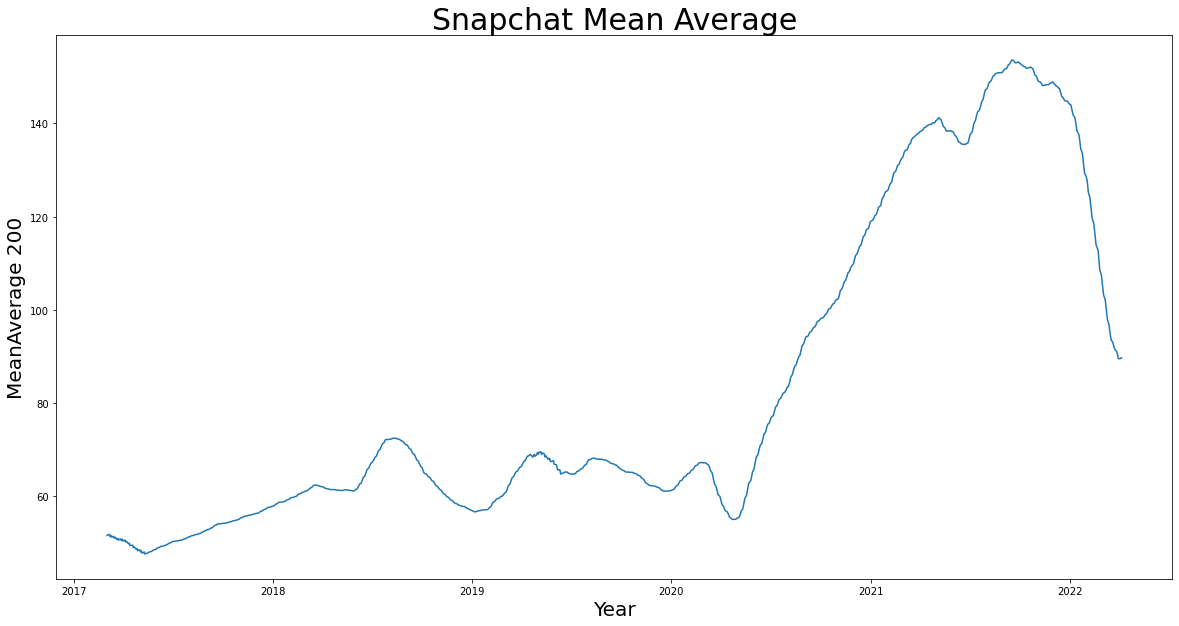

In [55]:
plt.figure(figsize=(20,10))
plt.plot('MA200', data = snap_df)
plt.title('Snapchat Mean Average', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('MeanAverage 200', fontsize = 20)

Text(0, 0.5, 'Price Change')

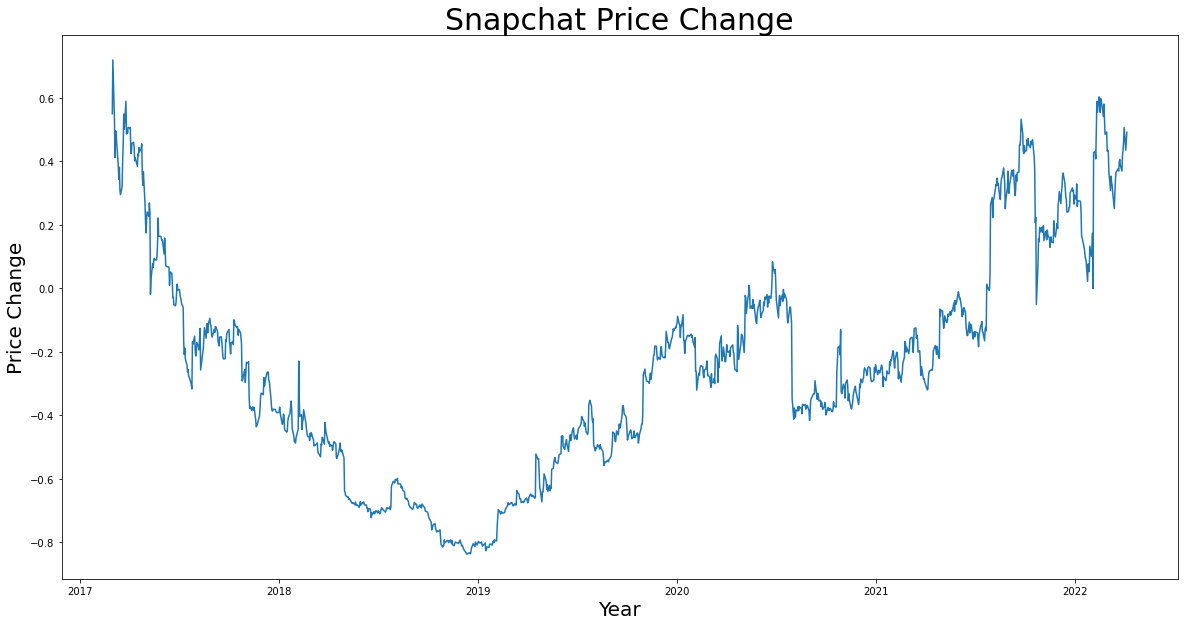

In [56]:
plt.figure(figsize=(20,10))
plt.plot('price change', data = snap_df)
plt.title('Snapchat Price Change', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('Price Change', fontsize = 20)

Text(0, 0.5, 'RSI')

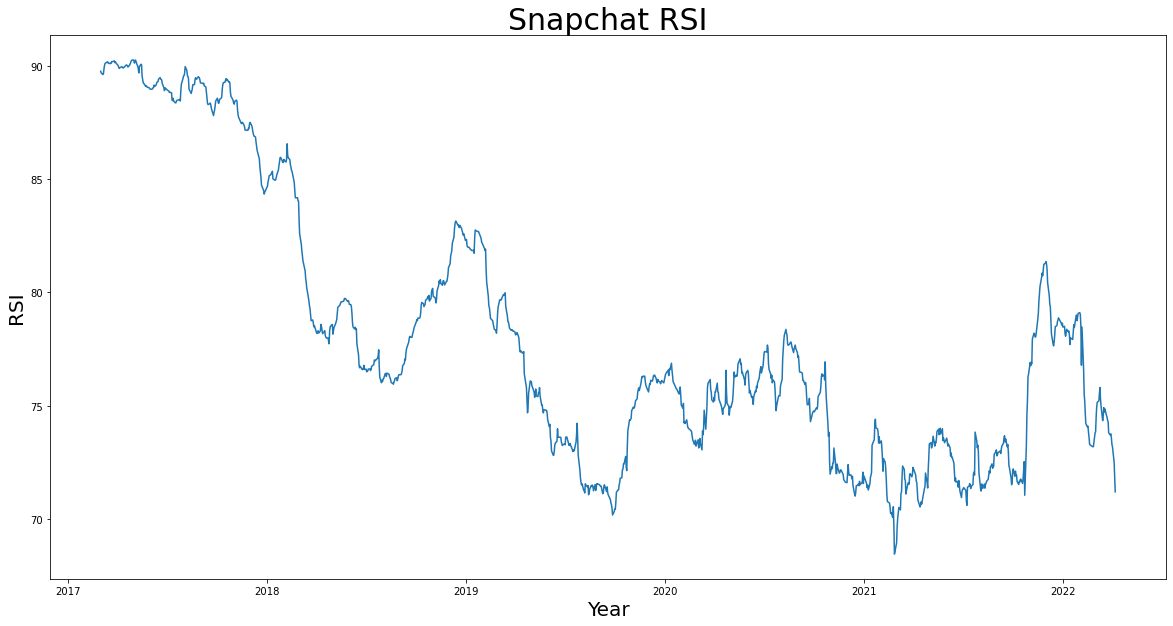

In [57]:
plt.figure(figsize=(20,10))
plt.plot('RSI', data = snap_df)
plt.title('Snapchat RSI', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('RSI', fontsize = 20)

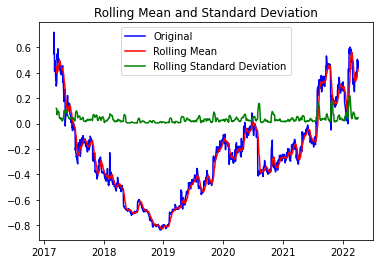

Results of ADF Test 
Test Statistics             -1.598703
P-Value                      0.484245
# of Lags Used               4.000000
# of Observations Used    1280.000000
critical value (1%)         -3.435469
critical value (5%)         -2.863801
critical value (10%)        -2.567974
dtype: float64


In [58]:
test_stationarity(snap_df['Returns'])


### Pintrest Analysis

In [59]:
pin_df = df[df['Symbol']=='PINS']


In [60]:
pin_df['Returns'].value_counts()\
            .head(10)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Set3', subset='Count')

Text(0, 0.5, 'MeanAverage 200')

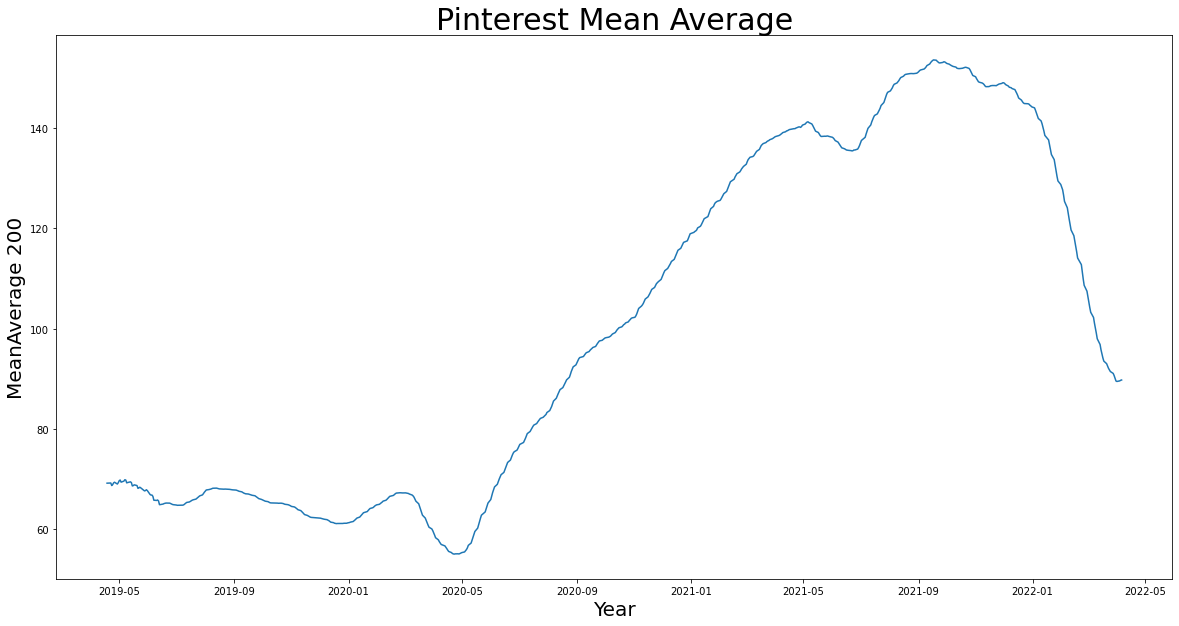

In [61]:
plt.figure(figsize=(20,10))
plt.plot('MA200', data = pin_df)
plt.title('Pinterest Mean Average', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('MeanAverage 200', fontsize = 20)

Text(0, 0.5, 'Price Change')

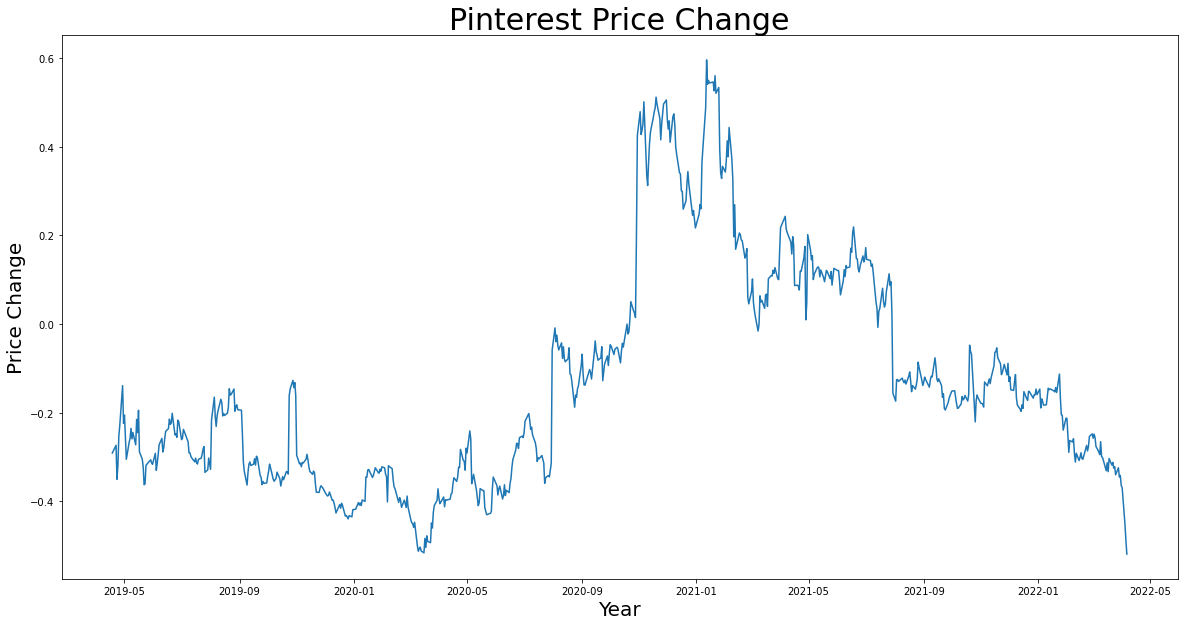

In [62]:
plt.figure(figsize=(20,10))
plt.plot('price change', data = pin_df)
plt.title('Pinterest Price Change', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('Price Change', fontsize = 20)

Text(0, 0.5, 'RSI')

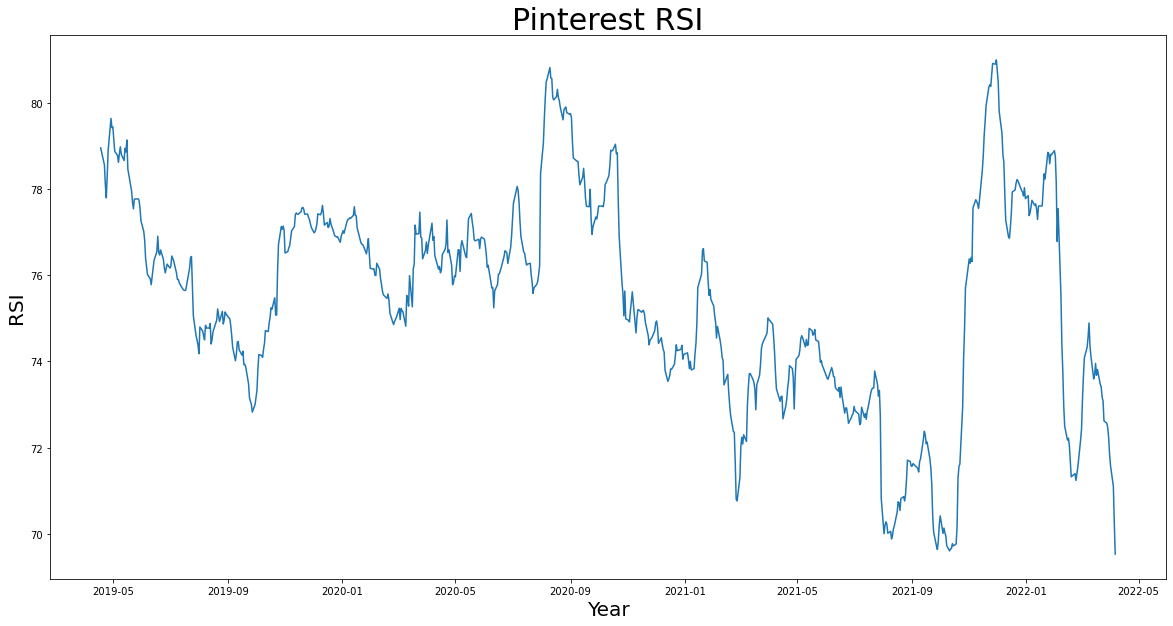

In [63]:
plt.figure(figsize=(20,10))
plt.plot('RSI', data = pin_df)
plt.title('Pinterest RSI', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('RSI', fontsize = 20)

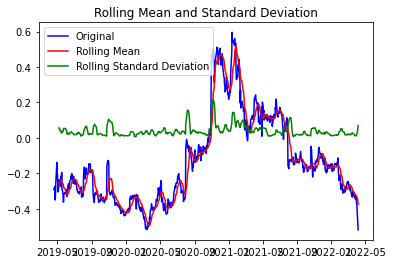

Results of ADF Test 
Test Statistics            -1.759153
P-Value                     0.400921
# of Lags Used              2.000000
# of Observations Used    746.000000
critical value (1%)        -3.439146
critical value (5%)        -2.865422
critical value (10%)       -2.568837
dtype: float64


In [64]:
test_stationarity(pin_df['Returns'])
